<a href="https://colab.research.google.com/github/hanbiphyun/ESSA_YB/blob/main/ESAA_YB3_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:


# 한글 폰트 설정
# 나눔 바른 고딕 폰트 설치
!apt-get update -qq
!apt-get install fonts-nanum -qq
!sudo fc-cache -fv
!rm -rf ~/.cache/matplotlib
import matplotlib.pyplot as plt # Add this line
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 기호 깨짐 방지
print("한글 폰트 설정 완료")


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Selecting previously unselected package fonts-nanum.
(Reading database ... 126435 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no

In [1]:


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # Add this line
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
train=pd.read_csv('/content/movies_train.csv')

In [3]:
train.head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


#2. EDA
**column: 제목, 배급사, 장르, 개봉일, 상영 시간, 상영 등급, 감독, dir_prev_bfnum, dir_prev_num, 스태프 수, 주연배우 수, 박스오피스 수**

- dir_prev_bfnum : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
- dir_prev_num : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


In [ ]:
train[train.dir_prev_num==0]

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
...,...,...,...,...,...,...,...,...,...,...,...,...
593,낭만파 남편의 편지,퍼스트런,미스터리,2013-09-12,97,청소년 관람불가,최위안,NaN,0,5,3,1132
594,오빠가 돌아왔다,(주)마운틴픽쳐스,코미디,2014-03-20,94,청소년 관람불가,노진수,NaN,0,37,5,1958
597,살인의 강,(주)마운틴픽쳐스,공포,2010-09-30,99,청소년 관람불가,김대현,NaN,0,123,4,2475
598,악의 연대기,CJ 엔터테인먼트,느와르,2015-05-14,102,15세 관람가,백운학,NaN,0,431,4,2192525


In [ ]:
train[train.num_staff==0]
#관객 수 적음
#이전에 찍은 영화가 없는 경우가 다수

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
11,무서운 집,(주)콘텐츠 윙,공포,2015-07-30,98,12세 관람가,양병간,NaN,0,0,1,1079
22,원령,조이앤시네마,공포,2015-08-13,91,15세 관람가,동지견,NaN,0,0,1,914
27,러브앤서울 복숭아마을 도색소동기,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
75,원 오브 어 카인드 3D,골든타이드픽처스,뮤지컬,2013-10-31,93,전체 관람가,손석,NaN,0,0,1,8083
87,먹이사슬,노바엔터테인먼트,멜로/로맨스,2014-09-17,100,청소년 관람불가,한동호,NaN,0,0,6,2070
88,야누스: 욕망의 두 얼굴,(주)패스파인더씨앤씨,미스터리,2014-08-14,83,청소년 관람불가,손영국,332.00,1,0,3,4122
125,하쿠나 마타타 - 지라니 이야기,이모션 픽처스,다큐멘터리,2010-12-09,90,전체 관람가,이창규,NaN,0,0,6,1253
173,법정스님의 의자,(주)키노아이,다큐멘터리,2011-05-12,75,전체 관람가,임성구,NaN,0,0,2,9438
191,꾸루꾸루와 친구들: 무지개 나무의 비밀,(주)팝엔터테인먼트,애니메이션,2015-11-19,74,전체 관람가,문제대,NaN,0,0,4,7408


In [ ]:
train[train.num_staff==0]
#다큐멘터리 영화 다수
#이전에 찍은 작품이 없는 경우 다수

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
11,무서운 집,(주)콘텐츠 윙,공포,2015-07-30,98,12세 관람가,양병간,NaN,0,0,1,1079
22,원령,조이앤시네마,공포,2015-08-13,91,15세 관람가,동지견,NaN,0,0,1,914
27,러브앤서울 복숭아마을 도색소동기,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745
75,원 오브 어 카인드 3D,골든타이드픽처스,뮤지컬,2013-10-31,93,전체 관람가,손석,NaN,0,0,1,8083
87,먹이사슬,노바엔터테인먼트,멜로/로맨스,2014-09-17,100,청소년 관람불가,한동호,NaN,0,0,6,2070
88,야누스: 욕망의 두 얼굴,(주)패스파인더씨앤씨,미스터리,2014-08-14,83,청소년 관람불가,손영국,332.00,1,0,3,4122
125,하쿠나 마타타 - 지라니 이야기,이모션 픽처스,다큐멘터리,2010-12-09,90,전체 관람가,이창규,NaN,0,0,6,1253
173,법정스님의 의자,(주)키노아이,다큐멘터리,2011-05-12,75,전체 관람가,임성구,NaN,0,0,2,9438
191,꾸루꾸루와 친구들: 무지개 나무의 비밀,(주)팝엔터테인먼트,애니메이션,2015-11-19,74,전체 관람가,문제대,NaN,0,0,4,7408


In [ ]:
train.isna().sum()
#이전에 찍은 작품이 없는 경우에 관객수 측정 불가

,0
title,0
distributor,0
genre,0
release_time,0
time,0
screening_rat,0
director,0
dir_prev_bfnum,330
dir_prev_num,0
num_staff,0


In [ ]:
train[train.dir_prev_bfnum.isna()].head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745


In [ ]:
train[train.dir_prev_bfnum.isna()].head(5)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778
9,청춘그루브,(주)두타연,드라마,2012-03-15,94,15세 관람가,변성현,NaN,0,138,3,868
10,AV 아이돌,(주) 케이알씨지,멜로/로맨스,2015-07-27,89,청소년 관람불가,조조 히데오,NaN,0,0,4,745


In [ ]:
train.dir_prev_bfnum.fillna(0, inplace=True)
train.dir_prev_bfnum.isna().sum()

np.int64(0)

In [15]:
train[train['release_time']].idxmax()

KeyError: "None of [DatetimeIndex(['2012-11-22', '2015-11-19', '2013-06-05', '2012-07-12',\n               '2010-11-04', '2012-10-25', '2013-05-23', '2012-10-11',\n               '2014-09-18', '2012-03-15',\n               ...\n               '2011-03-17', '2013-08-29', '2015-04-29', '2013-09-12',\n               '2014-03-20', '2014-08-13', '2013-03-14', '2010-09-30',\n               '2015-05-14', '2013-01-30'],\n              dtype='datetime64[ns]', length=600, freq=None)] are in the [columns]"

배급사 별 영화 수

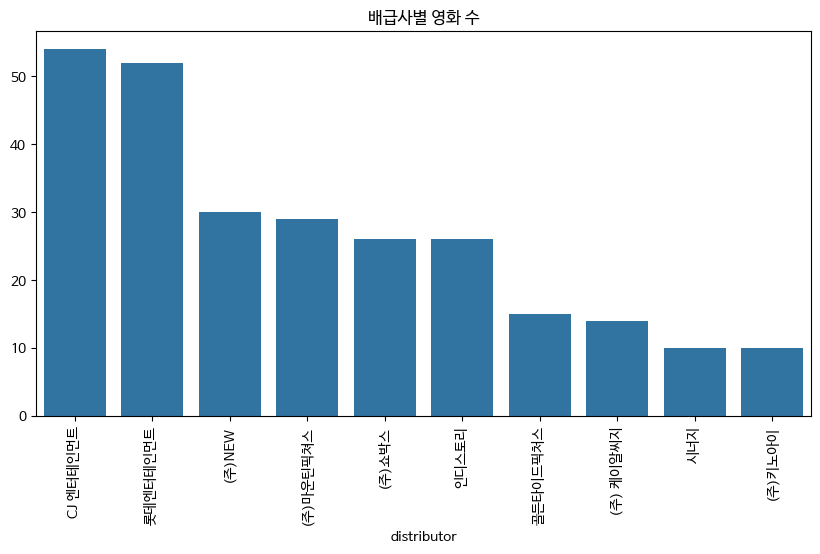

In [4]:
dist_count= train['distributor'].value_counts()
dist_count

plt.figure(figsize=(10,5))
sns.barplot(x=dist_count.index[:10], y=dist_count.values[:10])
plt.xticks(rotation=90)
plt.title("배급사별 영화 수")
plt.show()

#큰 배급사의 영화가 많음 - cj,롯데

장르 빈도수

- 드라마 매우 많음
- 생각보다 다큐 많음 (독립영화때문?)

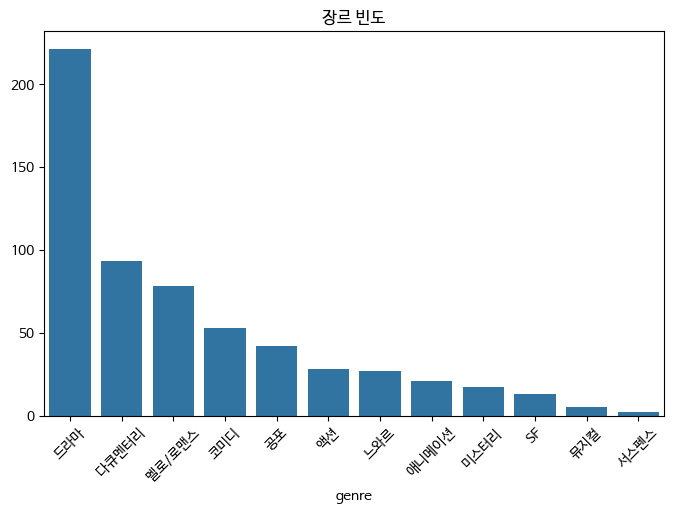

In [5]:
genre_count = train["genre"].value_counts()

plt.figure(figsize=(8,5))
sns.barplot(x=genre_count.index, y=genre_count.values)
plt.xticks(rotation=45)
plt.title("장르 빈도")
plt.show()

개봉일 최소, 최대일
- 2010년대 중 2015년까지의 영화 (생각보다 오래된..)

In [6]:
train["release_time"] = pd.to_datetime(train["release_time"])
print("최소 개봉일:", train["release_time"].min())
print("최대 개봉일:", train["release_time"].max())

최소 개봉일: 2010-01-02 00:00:00
최대 개봉일: 2015-12-31 00:00:00


등급별 영화 수
- 청불과 15세 이상이 많음 -> 영화의 주 타깃층?

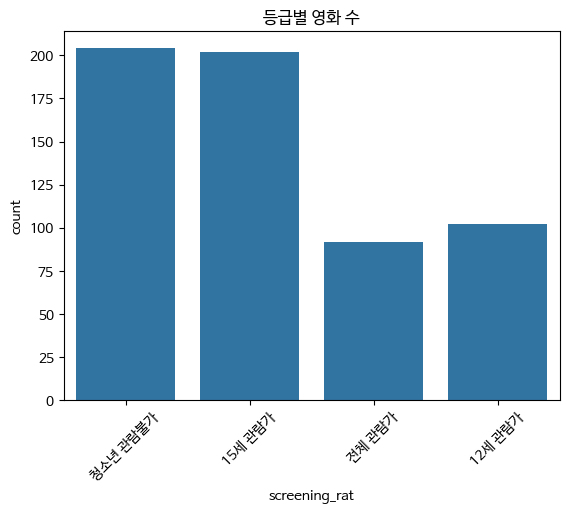

In [7]:
sns.countplot(x="screening_rat", data=train)
plt.title("등급별 영화 수")
plt.xticks(rotation=45)
plt.show()

이전 평균 관객 수 -히스토그램
- 중앙값 약 47만
- 3사분위 약 128만
- 현재 120만 근처에 많이 몰려있음


count    2.700000e+02
mean     1.050443e+06
std      1.791408e+06
min      1.000000e+00
25%      2.038000e+04
50%      4.784236e+05
75%      1.286569e+06
max      1.761531e+07
Name: dir_prev_bfnum, dtype: float64
[           nan 1.16160250e+06 2.20775250e+05 2.38940000e+04
 1.00000000e+00 8.37969000e+05 7.39522000e+05 4.31231000e+05
 5.34232500e+05 8.22334200e+06 7.73000000e+02 4.95068500e+05
 7.57400000e+04 6.83213333e+05 8.05250000e+03 4.59898500e+06
 9.84000000e+02 1.15995400e+06 6.95201500e+05 5.83770000e+05]


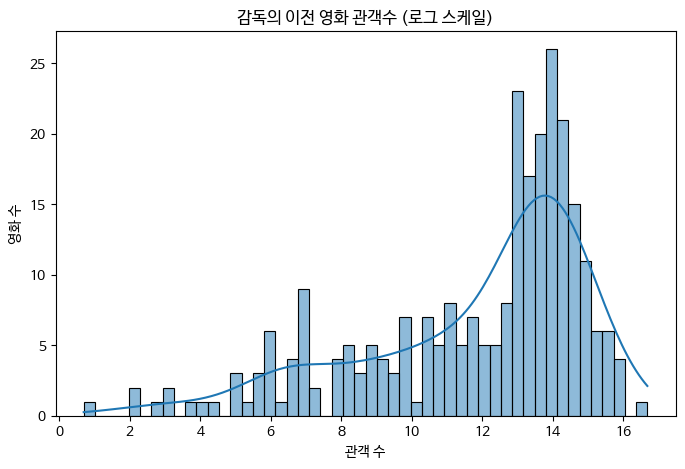

In [23]:
print(train["dir_prev_bfnum"].describe())
print(train["dir_prev_bfnum"].unique()[:20])  # 앞 20개 고유값

plt.figure(figsize=(8,5))
sns.histplot(np.log1p(train["dir_prev_bfnum"]), bins=50, kde=True)
plt.title("감독의 이전 영화 관객수 (로그 스케일)")
plt.xlabel("관객 수")
plt.ylabel("영화 수")
plt.show()



이전 관객 평균 수가 높은 감독 10명

In [22]:
train.sort_values("dir_prev_bfnum", ascending=False)[["director","dir_prev_bfnum"]].head(10)


,director,dir_prev_bfnum
338,고구마,17615314.0
214,김민석,8801639.0
16,강형철,8223342.0
118,심형래,7855474.0
409,강형철,7838528.5
326,장재현,6720926.5
434,김용화,6081480.0
76,정우철,5849451.0
498,최동훈,5169479.0
477,나홍진,5046096.0


이전 평균 관객 수 vs 이번 영화 관객 수
- 낮은 관객 수는 잘 모르겠지만 이전에 관객 수가 많은 경우에는 이번 영화도 높은 경우가 많다

                dir_prev_bfnum  box_off_num
dir_prev_bfnum        1.000000     0.283184
box_off_num           0.283184     1.000000


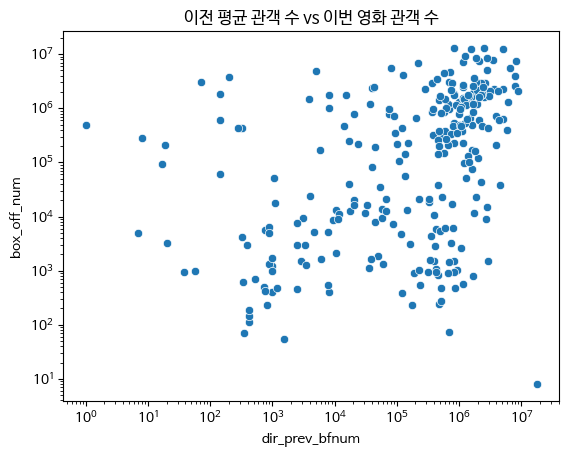

In [11]:
corr = train[["dir_prev_bfnum", "box_off_num"]].corr()
print(corr)

sns.scatterplot(x="dir_prev_bfnum", y="box_off_num", data=train)
plt.xscale("log")
plt.yscale("log")
plt.title("이전 평균 관객 수 vs 이번 영화 관객 수")
plt.show()

장르 vs 상영 등급
- 드라마는 주류 장르이기에 많은 영화의 등급인 15세와 청불에 많음
- 다큐멘터리는 전체 관람가가 많음
- 청불은 멜로

뻔한 ..?

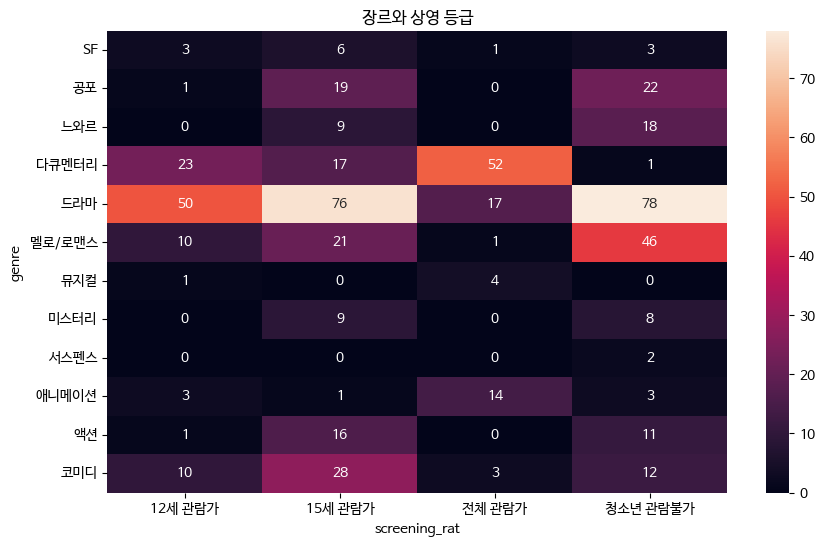

In [13]:
pivot = pd.crosstab(train["genre"], train["screening_rat"])

plt.figure(figsize=(10,6))
sns.heatmap(pivot, annot=True, fmt="d")
plt.title("장르와 상영 등급")
plt.show()

상영시간과 개봉일(월별) 산점도
- 큰 관계 없어보임

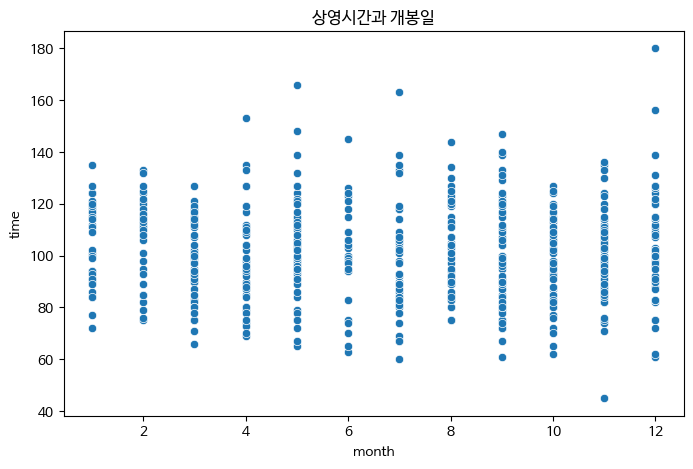

In [14]:
train["month"] = train["release_time"].dt.month

plt.figure(figsize=(8,5))
sns.scatterplot(x="month", y="time", data=train)
plt.title("상영시간과 개봉일")
plt.show()

이전 평균 관객수와 이번 관객수가 2배 차이나는 경우
- 1~3 은 이번 영화가 성공함
- 불량 남녀는 이전 관객수가 1 -> 이상점
- 강철대오는 낮아진 관객수 -> 이유 분석?

In [16]:
subset = train[(train["dir_prev_bfnum"] > 0) &
               ((train["box_off_num"] >= 2*train["dir_prev_bfnum"]) |
                (train["box_off_num"]*2 <= train["dir_prev_bfnum"]))]
print(subset[["title","dir_prev_bfnum","box_off_num"]].head())

            title  dir_prev_bfnum  box_off_num
1            내부자들      1161602.50      7072501
2       은밀하게 위대하게       220775.25      6959083
3        나는 공무원이다        23894.00       217866
4            불량남녀            1.00       483387
5  강철대오 : 구국의 철가방       837969.00       233211


배우 규모와 상영시간
- 큰 관련 없어보이지만 배우가 1명인 경우에 비해 2명 이상인 경우가 상영시간이 길어짐

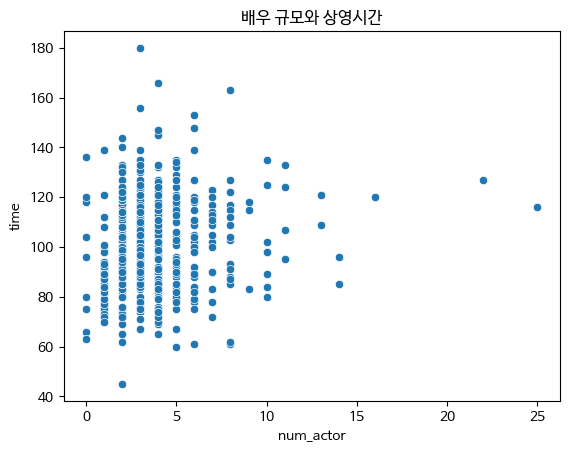

In [17]:
sns.scatterplot(x="num_actor", y="time", data=train)
plt.title("배우 규모와 상영시간")
plt.show()

살펴보고 싶은 EDA
- 배급사 별 영화 수
- 장르 빈도수
- 개봉일 최소, 최대일
- 등급별 영화 수
- 이전 평균 관객 수 히스토그램
- 이전에 참여한 영화 개수 최소, 최대
- 이전 평균 관객 수와 관객 수의 상관관계
- 장르와 상영등급-> 히트맵
- 상영시간과 개봉일 (달별로) - 산점도
- 이전 관객수와 이번 영화 관객수가 2배 차이나는 경우
- 배우 규모와 상영시간